<a href="https://colab.research.google.com/github/Tycour/crisanti-toolshed/blob/main/docs/lessons/Gotta_learn_em_all_Plotting_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn: Statistical Data Visualisation

Seaborn documentation / Help: https://seaborn.pydata.org/tutorial.html

Example Gallery: https://seaborn.pydata.org/examples/index.html

Pyplot documentation: https://matplotlib.org/tutorials/introductory/pyplot.html

Seaborn is a Python data visualization / plotting library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [ ]:
# Pandas for managing datasets
import pandas as pd

# Seaborn for plotting and styling
import seaborn as sns

# Apply default seaborn theme, scaling, and colour palette
sns.set()

# Matplotlib for additional customization
from matplotlib import pyplot as plt

In [ ]:
# Read dataset
df = pd.read_csv('/content/drive/My Drive/Coding club/_data/Pokemon.csv', encoding='mac_roman', index_col=0)

# Display first 5 rows
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# Seaborn's plotting functions

One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the `lmplot()` function.

There are two ways you can do so.

*   The first way (recommended) is to pass your DataFrame to the `data=` argument, while passing column names to the axes arguments, `x=` and `y=`.

*   The second way is to directly pass in Series of data to the axes arguments.

For example, let's compare the Attack and Defense stats for our Pokémon:

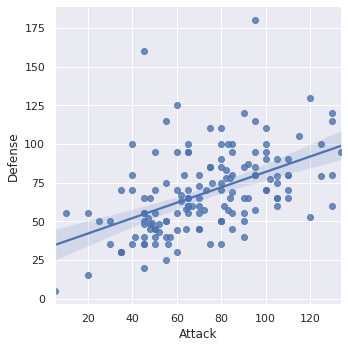

In [ ]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)

# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

Function documentation: https://seaborn.pydata.org/generated/seaborn.lmplot.html

---

Each plotting function contains multiple options you can access by using predefined arguments. In this case, we can remove the regression line by using `fit_reg=False`. We can also add a third dimension to the data simply by using `hue='Stage'`.

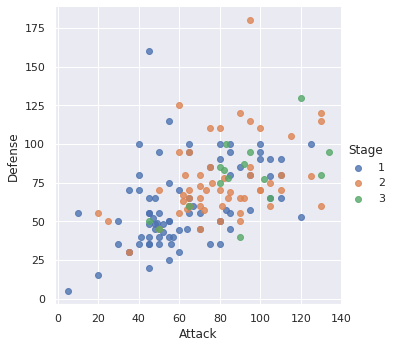

In [ ]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Colour by pokemon evolution stage

# sns.scatterplot(x='Attack', y='Defense', data=df, hue='Stage')

(0.0, 140.45)

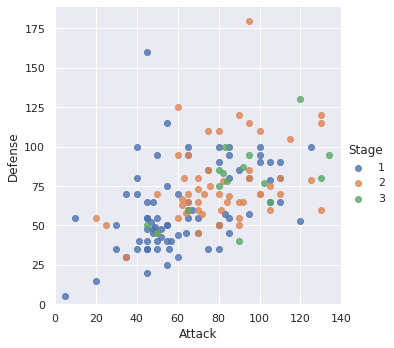

In [ ]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweaking scales using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

#The role of Pandas

Seaborn can't polish a turd, you have to come to it with your data adeqately formatted for the right type of chart.

For example, let's say we wanted to make a box plot for our Pokémon's combat stats:

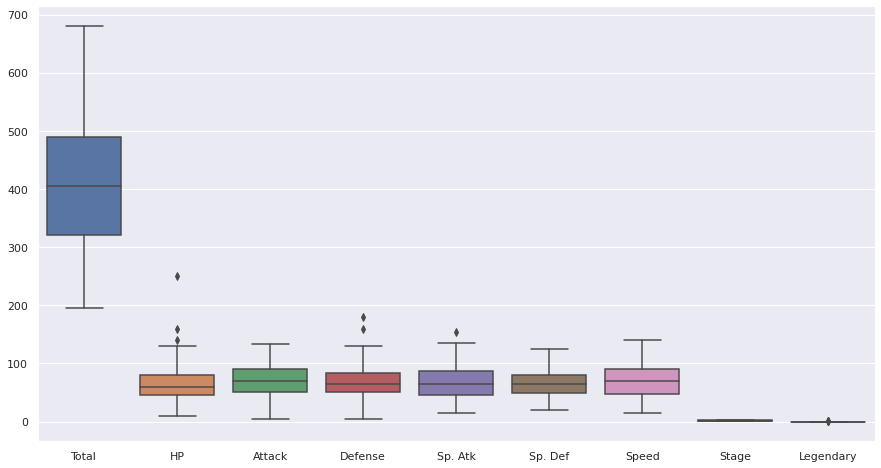

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(15,8))

# Boxplot
sns.boxplot(data=df)

(0.0, 262.25)

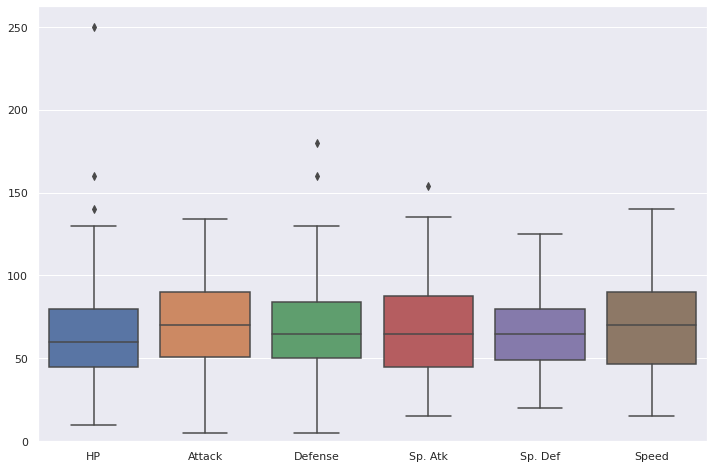

In [ ]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

plt.figure(figsize=(12,8))
# New boxplot using stats_df
sns.boxplot(data=stats_df)
plt.ylim(0, None)

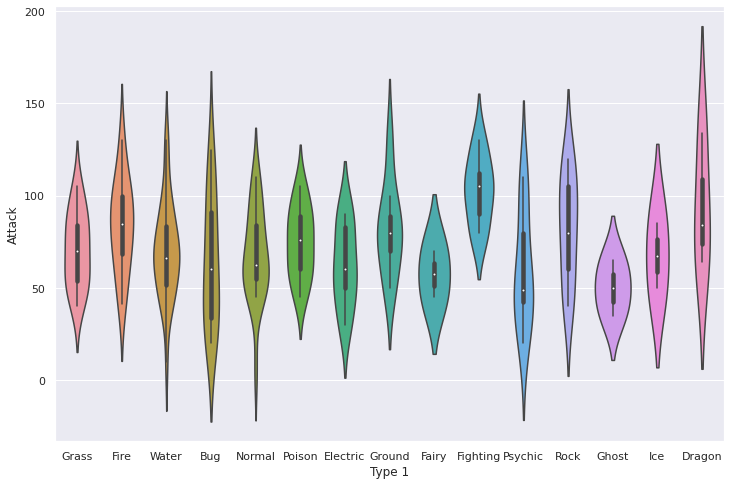

In [ ]:
plt.figure(figsize=(12,8))

# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

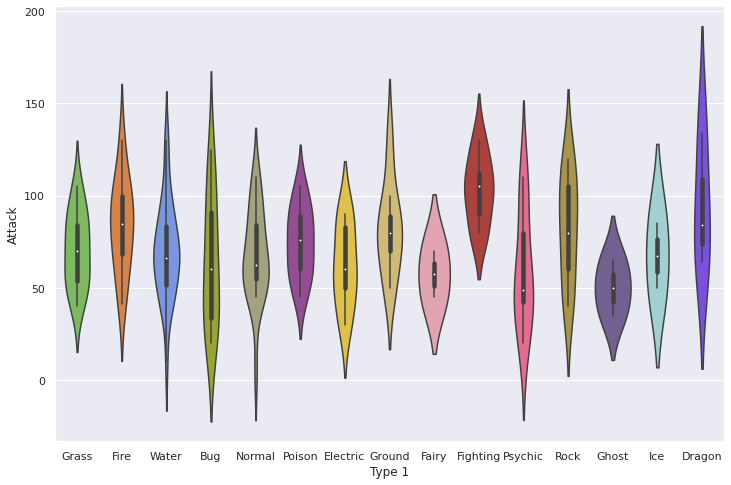

In [ ]:
# Add colour palettes to match actual Pokemon stat colours
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8']  # Dragon

plt.figure(figsize=(12,8))

# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

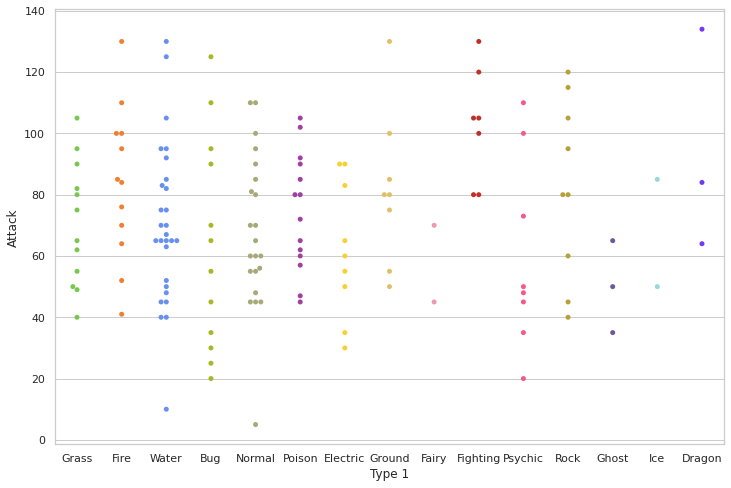

In [ ]:
plt.figure(figsize=(12,8))

# Set theme
sns.set_style('whitegrid')

# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

#Overlaying plots

(-33.19489080927033, 200.0)

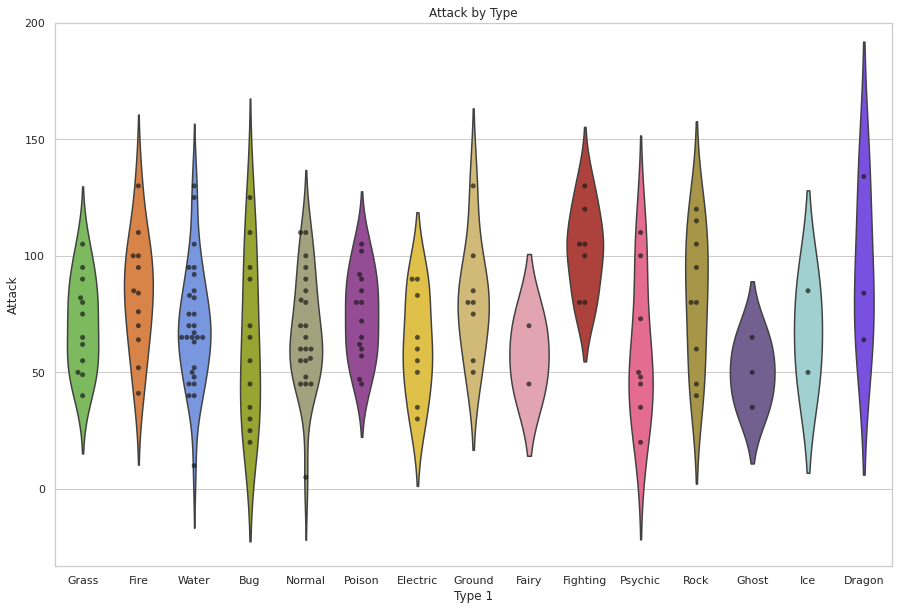

In [ ]:
plt.figure(figsize=(15,10))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) 
 
# Set title with matplotlib
plt.title('Attack by Type')
plt.ylim(None, 200)

# Data Wrangling

To achieve a chart that encapsulates the most information, you may need to do some **data wrangling**. This simply means formatting your raw data to make it appropriate for downstream processes.

In [ ]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


As you can see, all of our stats are in separate columns. Instead, we want to "melt" them into one column.

To do so, we'll use Pandas's melt() function. It takes 3 arguments:

* First, the DataFrame to melt.
* Second, ID variables to keep (Pandas will melt all of the other ones by default).
* Finally, a name for the new, melted variable.

Here's the output:

In [ ]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [ ]:
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


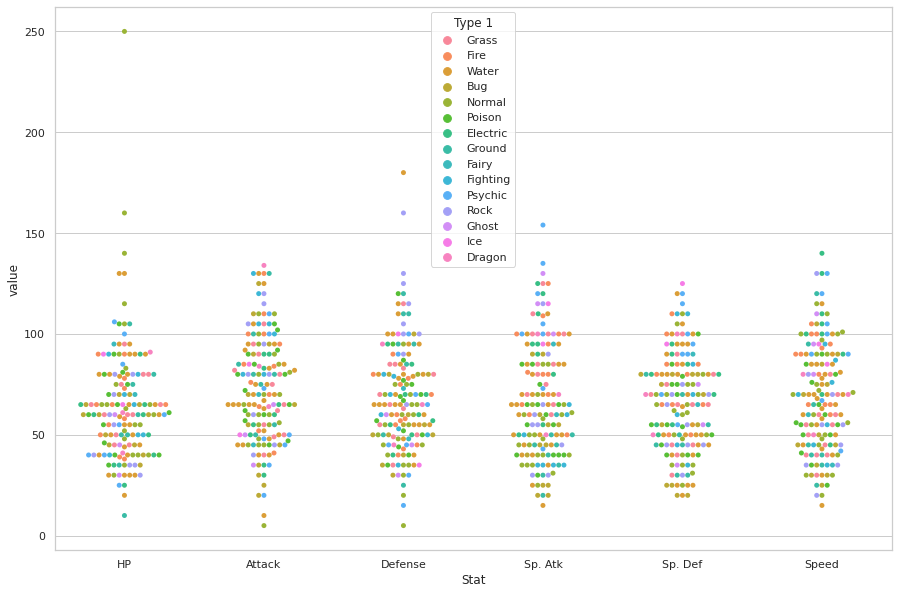

In [ ]:
plt.figure(figsize=(15,10))

# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

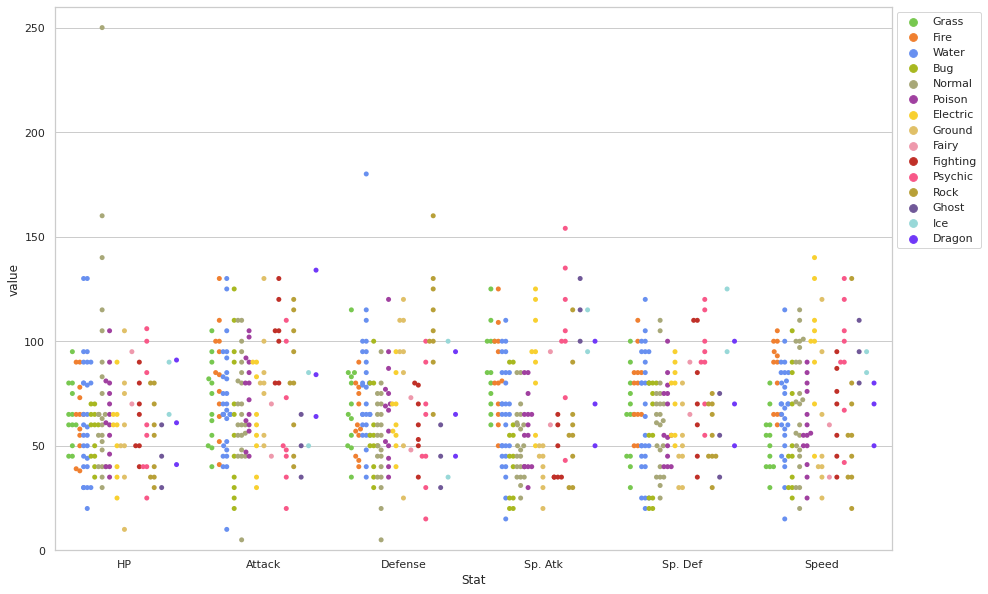

In [ ]:
plt.figure(figsize=(15,10))

sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # Separate points by hue
              palette=pkmn_type_colors) # Use Pokemon palette
 
# Adjust the y-axis
plt.ylim(0, 260)
 
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

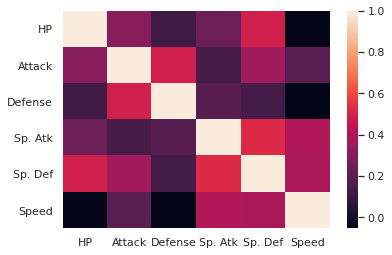

In [ ]:
# Calculate correlations
corr_df = stats_df.corr()
corr_df
 
# Heatmap
sns.heatmap(corr)

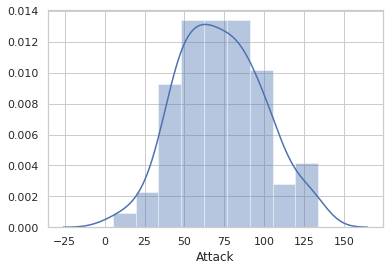

In [ ]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

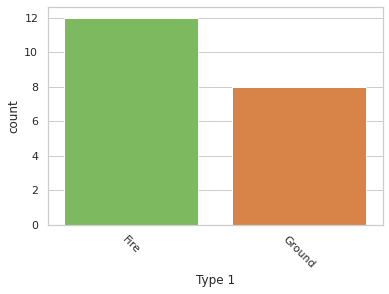

In [ ]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors, order=['Fire', 'Ground'])
 
# Rotate x-labels
plt.xticks(rotation=-45)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

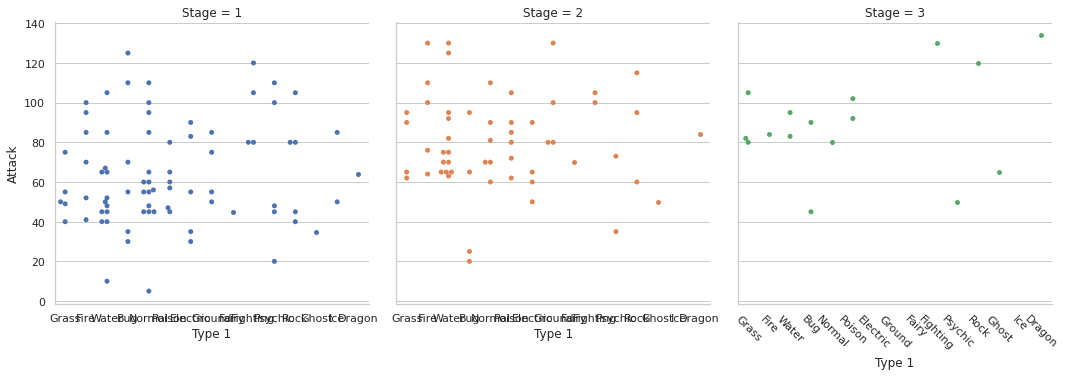

In [ ]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot

# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

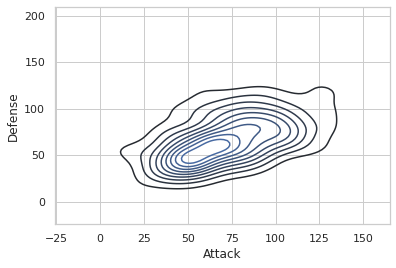

In [ ]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

(0.0, 200.0)

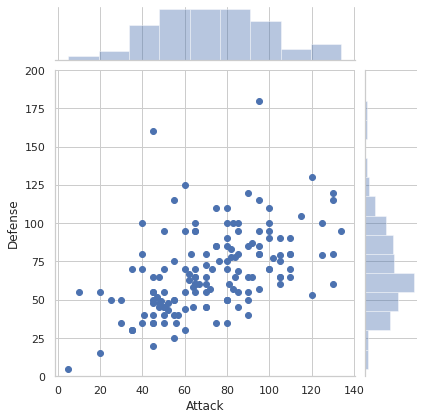

In [ ]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

plt.ylim(0, 200)

# Exercise

1. 'Melt' Chryssa's Agam testes data.
2. Produce a chart that provides some insight into the data. You can show anything on the dataset as a whole or just a restricted subset.
3. Produce a lineplot featuring two genes with different meiotic stage specificities.